Precisión del modelo: 49.61%
F1-score: 0.0
[[4961    0]
 [5039    0]]


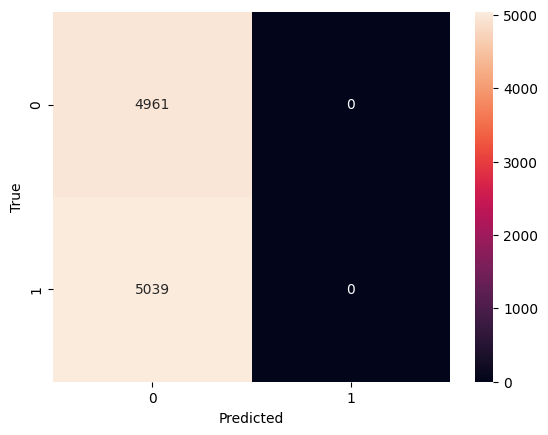

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step


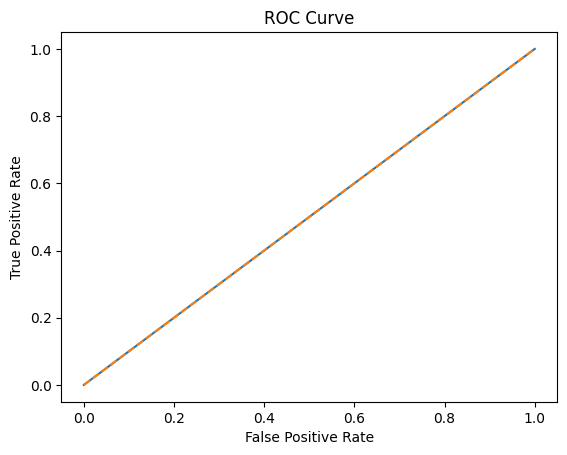

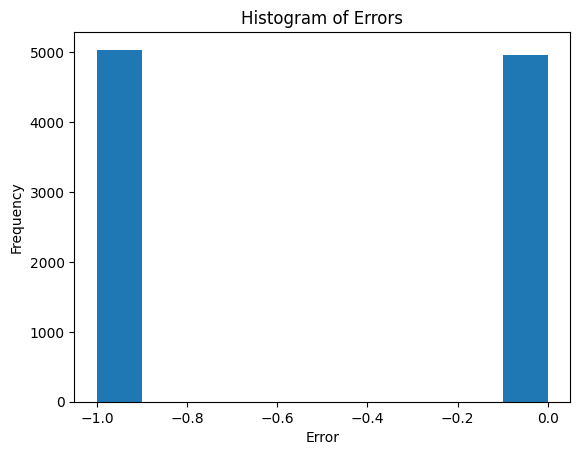

In [9]:
#!pip install tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Use tensorflow.keras
from tensorflow.keras.layers import Dropout # Import Dropout layer
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Importando dataset
df = pd.read_csv('IMDB Dataset SPANISH.csv')
print(df.head())
print(df.describe())
print(df.info())

# Preprocesamiento de las secuencias
review = []
sentences = list(df['review_es'])
for sen in sentences:
    review.append(sen)

# Preprocesamiento de las secuencias
labels = df['sentimiento']
labels = np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

# Preprocesamiento de las secuencias
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20, random_state=42)

# Parametros
vocab_size = 100000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# inicializar la clase tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Generar el diccionario de indices de palabras para el entrenamiento de las frases
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generar y hacer pad a las secuencias entrenadas
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Generar y hacer pad a las secuencias de prueba
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Contruir el modelo
model = keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprimir el resumen del modelo
model.summary()

num_epochs = 10

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs = num_epochs, validation_data = (testing_padded, test_labels))


# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)
plt.show()

# Genera predicciones para los datos de prueba
predictions = model.predict(testing_padded)
# Convierte las probabilidades en etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calcula la precisión del modelo
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

f1 = f1_score(test_labels, predicted_labels)
print(f"F1-score: {f1}")

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_pred_proba = model.predict(testing_padded)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # Changed line: plot the diagonal directly
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

errors = predicted_labels.flatten() - test_labels
plt.hist(errors, bins=10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 194s 150ms/step - accuracy: 0.5150 - loss: 0.6920 - val_accuracy: 0.5039 - val_loss: 0.6929
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 154ms/step - accuracy: 0.5243 - loss: 0.6864 - val_accuracy: 0.7478 - val_loss: 0.5294
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 143ms/step - accuracy: 0.8136 - loss: 0.4221 - val_accuracy: 0.8282 - val_loss: 0.3808
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 194s 137ms/step - accuracy: 0.9127 - loss: 0.2314 - val_accuracy: 0.8328 - val_loss: 0.3885
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 136ms/step - accuracy: 0.9466 - loss: 0.1521 - val_accuracy: 0.8289 - val_loss: 0.4199
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 178s 143ms/step - accuracy: 0.9661 - loss: 0.1019 - val_accuracy: 0.8273 - val_loss: 0.4966
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 135ms/step - accuracy: 0.9795 - loss: 0.0690 - val_accuracy: 0.8227 - val_loss: 0.5919
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 134ms/step - ac

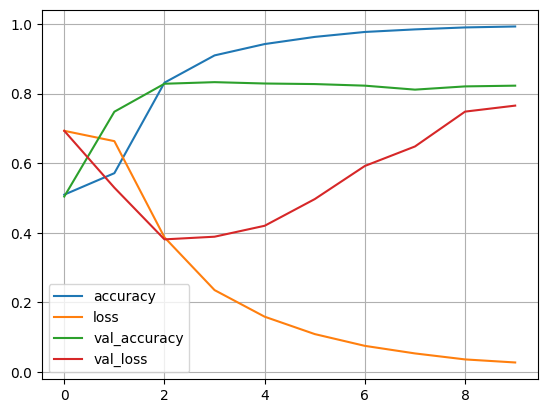

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
Precisión del modelo: 82.27%
F1-score: 0.819505242797516
[[4202  759]
 [1014 4025]]


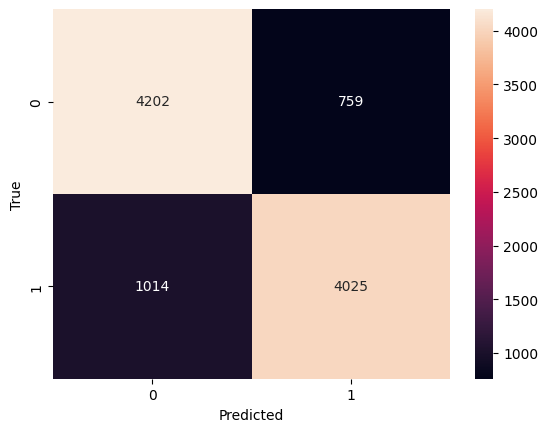

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


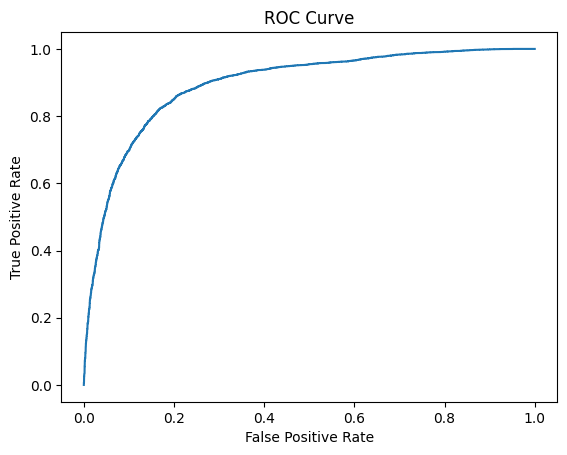

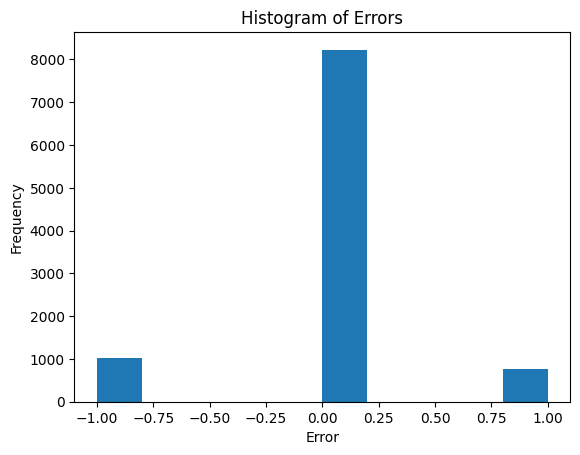

In [ ]:
# Contruir el modelo
model = keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprimir el resumen del modelo
model.summary()

num_epochs = 10

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs = num_epochs, validation_data = (testing_padded, test_labels))


# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)
plt.show()

# Genera predicciones para los datos de prueba
predictions = model.predict(testing_padded)
# Convierte las probabilidades en etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calcula la precisión del modelo
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

f1 = f1_score(test_labels, predicted_labels)
print(f"F1-score: {f1}")

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_pred_proba = model.predict(testing_padded)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
plt.plot(plt.plot(fpr, tpr, [0, 1], [0, 1], linestyle='--'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

errors = predicted_labels.flatten() - test_labels
plt.hist(errors, bins=10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step
Precisión del modelo: 49.61%
F1-score: 0.0
[[4961    0]
 [5039    0]]


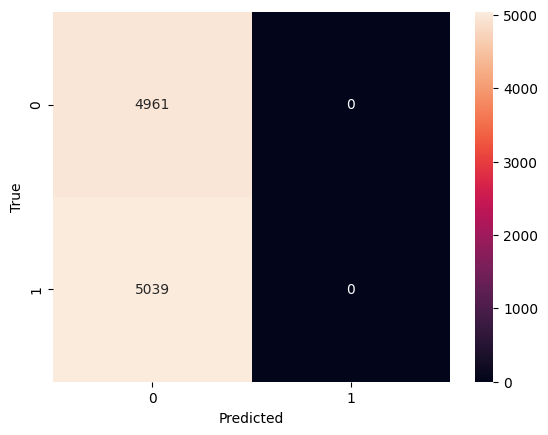

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step


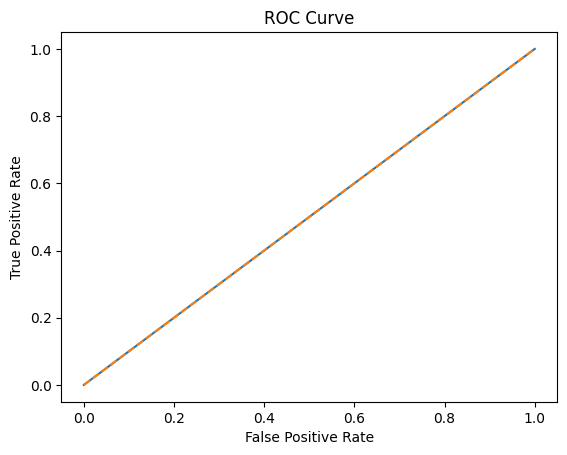

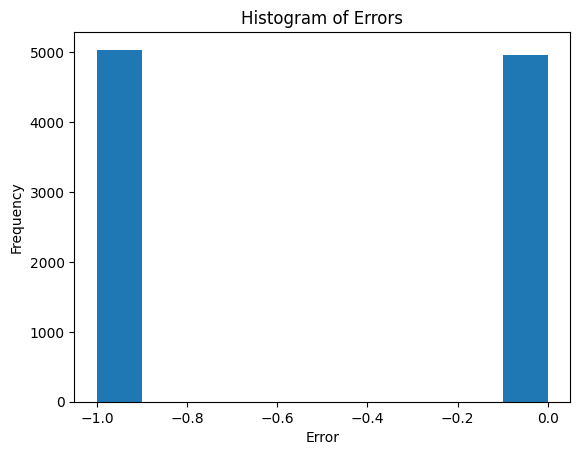

In [8]:
# Contruir el modelo
model = keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(128, return_sequences=True),
    Dropout(0.25),
    keras.layers.LSTM(64, return_sequences=True), # Add return_sequences=True
    Dropout(0.25),
    keras.layers.LSTM(32),
    Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.25),
    keras.layers.Dense(32, activation='relu'),
    Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprimir el resumen del modelo
model.summary()

num_epochs = 10

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs = num_epochs, validation_data = (testing_padded, test_labels))


# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)
plt.show()

# Genera predicciones para los datos de prueba
predictions = model.predict(testing_padded)
# Convierte las probabilidades en etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calcula la precisión del modelo
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

f1 = f1_score(test_labels, predicted_labels)
print(f"F1-score: {f1}")

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_pred_proba = model.predict(testing_padded)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
# Remove the nested plt.plot call
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

errors = predicted_labels.flatten() - test_labels
plt.hist(errors, bins=10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()